In [17]:
# 导入必要的库 

import numpy as np # 数学计算 
import pandas as pd # 数据处理, 读取 CSV 文件 (e.g. pd.read_csv) 
import matplotlib.pyplot as plt # 可视化工具 
from datetime import datetime as dt # 时间的工具 
from sklearn.linear_model import LinearRegression # 线性回归模型库 
from sklearn import preprocessing # 归一化时用到 

In [18]:
# 读取某一只股票的行情数据 
df = pd.read_csv('000001.csv') 

print(np.shape(df))

(611, 14)


In [20]:
df

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2019-05-30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39
1,2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95
2,2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43
3,2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10
4,2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98
5,2019-05-23,12.24,12.42,12.29,12.14,666855.44,-0.11,-0.89,12.414,12.531,13.014,731146.55,851153.75,1069202.04
6,2019-05-22,12.57,12.57,12.40,12.32,506230.72,-0.16,-1.27,12.526,12.518,13.107,724755.75,940183.37,1101972.96
7,2019-05-21,12.40,12.73,12.56,12.36,731210.50,0.18,1.45,12.630,12.538,13.223,844307.30,987105.38,1138963.23
8,2019-05-20,12.35,12.54,12.38,12.25,786435.19,-0.06,-0.48,12.616,12.577,13.312,934584.83,1021250.17,1127754.97
9,2019-05-17,12.92,12.93,12.44,12.36,965000.88,-0.41,-3.19,12.600,12.626,13.411,925681.34,1153473.43,1138638.70


In [21]:
# 把字符串转换成时间格式 
df['date'] = pd.to_datetime(df['date']) 
df = df.set_index('date') 

# 按照时间升序排列 
df.sort_values(by=['date'], inplace=True, ascending=True) 

In [23]:
df

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2016-11-29,9.59,9.70,9.62,9.55,887779.19,-0.01,-0.10,9.620,9.620,9.620,887779.19,887779.19,887779.19
2016-11-30,9.65,9.72,9.55,9.50,1025963.06,-0.07,-0.73,9.585,9.585,9.585,956871.13,956871.13,956871.13
2016-12-01,9.57,9.63,9.60,9.55,646004.38,0.05,0.52,9.590,9.590,9.590,853248.88,853248.88,853248.88
2016-12-02,9.60,9.60,9.55,9.44,829686.50,-0.05,-0.52,9.580,9.580,9.580,847358.28,847358.28,847358.28
2016-12-05,9.50,9.54,9.46,9.41,764365.69,-0.09,-0.94,9.556,9.556,9.556,830759.76,830759.76,830759.76
2016-12-06,9.48,9.52,9.49,9.45,602902.75,0.03,0.32,9.530,9.545,9.545,773784.48,792783.60,792783.60
2016-12-07,9.48,9.49,9.48,9.41,493404.75,-0.01,-0.10,9.516,9.536,9.536,667272.81,750015.19,750015.19
2016-12-08,9.50,9.55,9.52,9.43,671452.19,0.04,0.42,9.500,9.534,9.534,672362.38,740194.81,740194.81
2016-12-09,9.50,9.75,9.65,9.48,1514199.25,0.13,1.37,9.520,9.547,9.547,809264.93,826195.31,826195.31


In [24]:
# 创建新的列, 包含预测值, 根据当前的数据预测5天以后的收盘价 
num = 5 # 预测5天后的情况 
df['label'] = df['close'].shift(-num) # 预测值 

In [26]:
df.tail()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98,NaN
2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10,NaN
2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43,NaN
2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95,NaN
2019-05-30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39,NaN


In [27]:
# 由于数据往前移了5位,所以最后5个样本的label值为"NA",在这里去掉包含”NA"的样本。 
df.dropna(inplace=True) 

In [28]:
df.tail()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2019-05-17,12.92,12.93,12.44,12.36,965000.88,-0.41,-3.19,12.600,12.626,13.411,925681.34,1153473.43,1138638.70,12.35
2019-05-20,12.35,12.54,12.38,12.25,786435.19,-0.06,-0.48,12.616,12.577,13.312,934584.83,1021250.17,1127754.97,12.37
2019-05-21,12.40,12.73,12.56,12.36,731210.50,0.18,1.45,12.630,12.538,13.223,844307.30,987105.38,1138963.23,12.49
2019-05-22,12.57,12.57,12.40,12.32,506230.72,-0.16,-1.27,12.526,12.518,13.107,724755.75,940183.37,1101972.96,12.40
2019-05-23,12.24,12.42,12.29,12.14,666855.44,-0.11,-0.89,12.414,12.531,13.014,731146.55,851153.75,1069202.04,12.22


In [30]:
# 在本次预测任务中先不考虑"price_change"和"p_change"两个字段。 
X = df.drop(['price_change', 'label', 'p_change'],axis=1) 

In [31]:
# 对于特征做归一化,使用z-score normalization 
X = X.values 
X = preprocessing.scale(X) 

# 提取预测值 
y = df.label.values 

In [32]:
print(np.shape(X), np.shape(y)) 

(606, 11) (606,)


In [33]:
X

array([[-0.76502839, -0.75825798, -0.75279219, ..., -0.2705086 ,
        -0.29105361, -0.31108821],
       [-0.72697009, -0.74610002, -0.79699562, ..., -0.13577663,
        -0.14605947, -0.15337543],
       [-0.77771449, -0.80081087, -0.76542174, ..., -0.33784405,
        -0.36351782, -0.38990885],
       ...,
       [ 1.01736875,  1.08367423,  1.10375203, ..., -0.35528048,
        -0.08261084,  0.26227725],
       [ 1.12520061,  0.98641049,  1.00271561, ..., -0.58841065,
        -0.18107987,  0.17784138],
       [ 0.91587995,  0.89522572,  0.93325307, ..., -0.57594834,
        -0.36791459,  0.10303682]])

In [34]:
# 把数据分为训练和测试数据。我们把一开始的550个样本作为训练数据,之后的样本作为 
# 测试数据 

X_train, y_train = X[0:550, :], y[0:550] 
X_test, y_test = X[550:606,:], y[550:606] 

In [37]:
lr = LinearRegression() # sklearn
lr.fit(X_train, y_train)
# 对于每个测试样本做预测 
y_pred = lr.predict(X_test) 

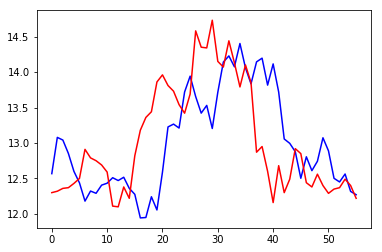

[-0.76234     0.83214352  0.24463705  1.09141555  0.00438079 -0.30717535
  0.19354311  0.24902077  0.17472336  0.08873934 -0.27910703]


In [36]:
# 画出通过模型预测出来的股价 
plt.plot(y_pred, color='b') 

# 画出真实的股价,并做对比 
plt.plot(y_test, color="r") 
plt.show() 
print (lr.coef_) 